In [28]:
# import library and load dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import os


In [29]:
# load dataset
data_path = '../data/processed/data_cleaned_scaled_onehot.csv' 
data = pd.read_csv(data_path)

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. K-Means 

## 1.1 Search for best k of training

k=2, score=0.22367966968985398
k=3, score=0.2473461011294509
k=4, score=0.08664530440691477
k=5, score=0.08562650004035768
k=6, score=0.09145191633101156
k=7, score=0.10061075793027464
k=8, score=0.10392171343001419
k=9, score=0.10190873189852692
k=10, score=0.09827755706488601


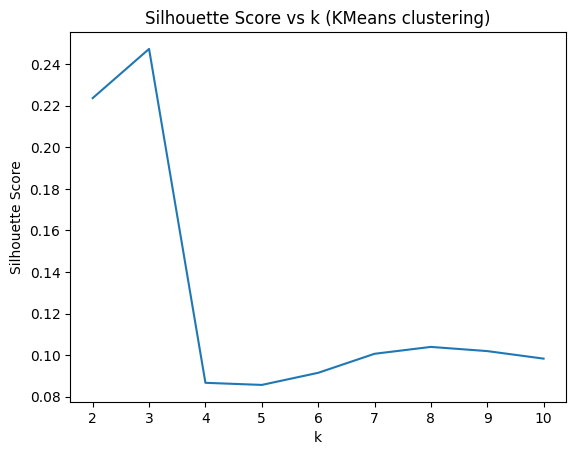

In [30]:
# search for the best k value for KMeans clustering
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores

plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k (KMeans clustering)')
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_silhouette_kmeans.png'))
plt.show()

## 1.2 3D plot for KMeans clusters

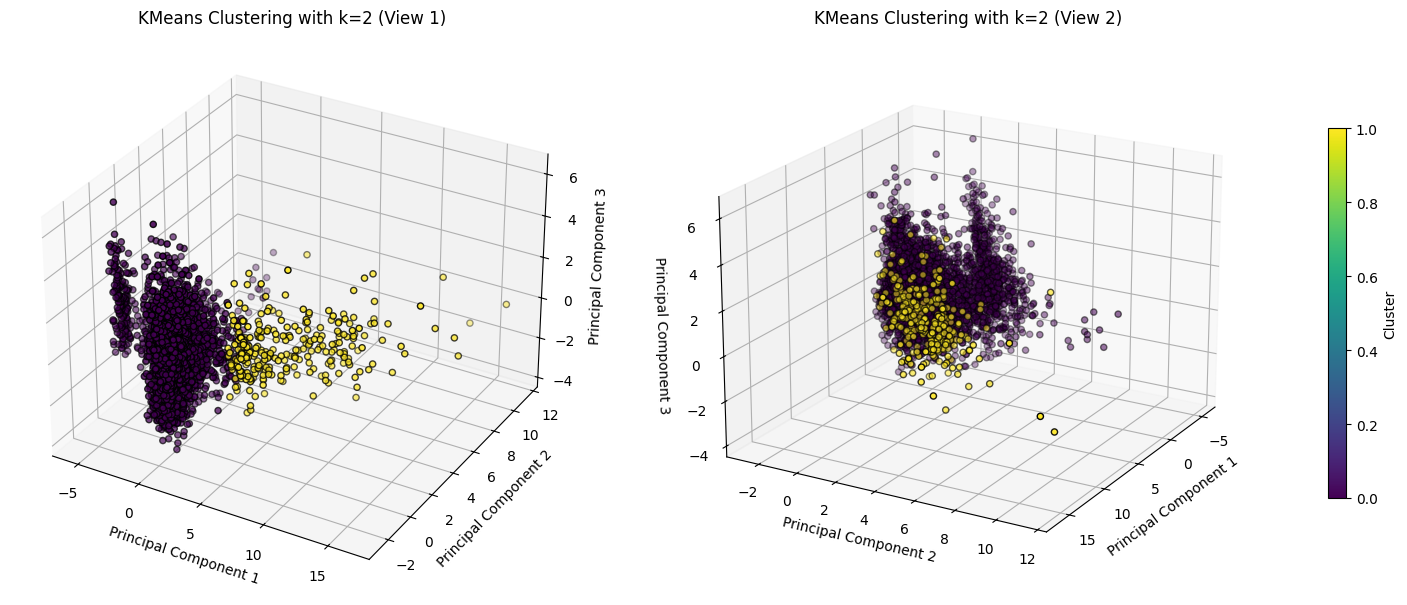

In [31]:
# draw the scatter plot of the data

pca = PCA(n_components=3)
X_scatter = pca.fit_transform(X)

best_k = 2

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scatter)


# # 3D plot for KMeans clusters

# Create a single figure with two subplots
fig = plt.figure(figsize=(20, 8))

# Subplot 1: View 1
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], 
                        c=kmeans.labels_, cmap='viridis', edgecolor='k')
ax1.set_title(f"KMeans Clustering with k={best_k} (View 1)")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_zlabel("Principal Component 3")
# ax1.view_init(elev=20, azim=30)  # Adjust angle for first view

# Subplot 2: View 2
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], 
                        c=kmeans.labels_, cmap='viridis', edgecolor='k')
ax2.set_title(f"KMeans Clustering with k={best_k} (View 2)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")
ax2.view_init(elev=20, azim=30)  # Adjust angle for second view

# Add a single colorbar for both plots
cbar = fig.colorbar(scatter1, ax=[ax1, ax2], shrink=0.6, location='right', label="Cluster")

# Save the combined figure
plt.savefig(os.path.join('../results/', 'clustering_3d_kmeans.png'))

plt.show()


## 1.3 Visualize KMeans clusters and true labels

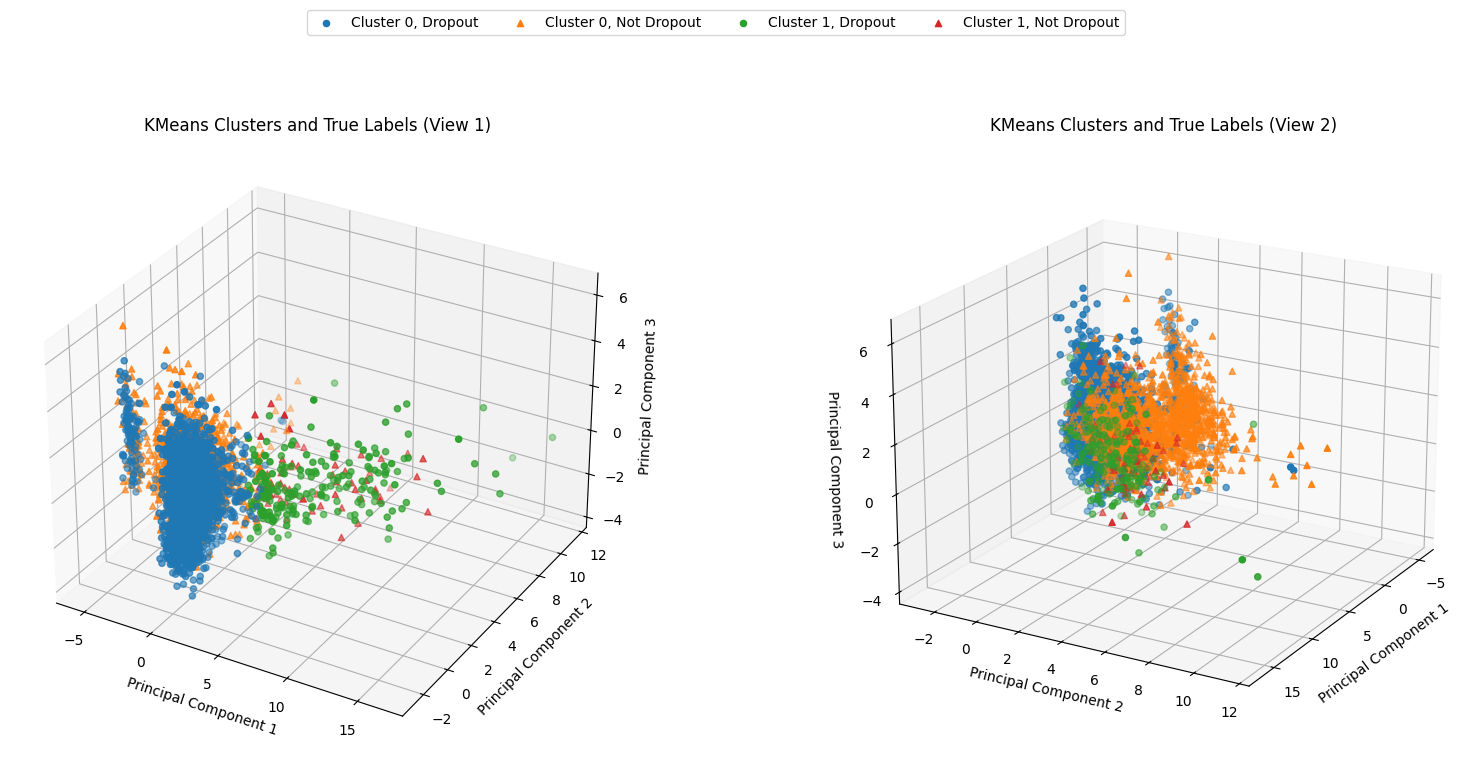

In [32]:
# Create a single figure with two subplots
fig = plt.figure(figsize=(20, 8))

# Subplot 1: View 1
ax1 = fig.add_subplot(121, projection='3d')

# Define marker styles for targets
marker_styles = ['o', '^']  # 'o' for Dropout, '^' for Not Dropout
target_names = {0: 'Dropout', 1: 'Not Dropout'}  # Mapping for legend

# Loop through clusters and targets for View 1
for cluster_id in np.unique(kmeans.labels_):
    cluster_mask = (kmeans.labels_ == cluster_id)
    for target in np.unique(y):
        target_mask = (y == target)
        combined_mask = cluster_mask & target_mask
        ax1.scatter(
            X_scatter[combined_mask, 0],
            X_scatter[combined_mask, 1],
            X_scatter[combined_mask, 2],
            marker=marker_styles[target],
            label=f'Cluster {cluster_id}, {target_names[target]}'
        )

ax1.set_title("KMeans Clusters and True Labels (View 1)")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_zlabel("Principal Component 3")
#ax1.view_init(elev=20, azim=30)  # Adjust viewpoint for first plot

# Subplot 2: View 2
ax2 = fig.add_subplot(122, projection='3d')

# Loop through clusters and targets for View 2
for cluster_id in np.unique(kmeans.labels_):
    cluster_mask = (kmeans.labels_ == cluster_id)
    for target in np.unique(y):
        target_mask = (y == target)
        combined_mask = cluster_mask & target_mask
        ax2.scatter(
            X_scatter[combined_mask, 0],
            X_scatter[combined_mask, 1],
            X_scatter[combined_mask, 2],
            marker=marker_styles[target],
            label=f'Cluster {cluster_id}, {target_names[target]}'
        )

ax2.set_title("KMeans Clusters and True Labels (View 2)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")
ax2.view_init(elev=20, azim=30)  # Adjust viewpoint for second plot

# Add a single legend for clarity
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))

# Save the combined plot
plt.savefig(os.path.join('../results/', 'clustering_3d_target_kmeans.png'))

plt.show()

# 2. Hierarchical Clustering 

## 2.1 Searchong for the best k values based on Silhouette scores

k=2, score=0.20258783444352477
k=3, score=0.21919703450421268
k=4, score=0.22677731795102601
k=5, score=0.10368179780371908
k=6, score=0.10511020261953896
k=7, score=0.10671466236247494
k=8, score=0.07481943183045814
k=9, score=0.07774559730659064
k=10, score=0.08042449244925022


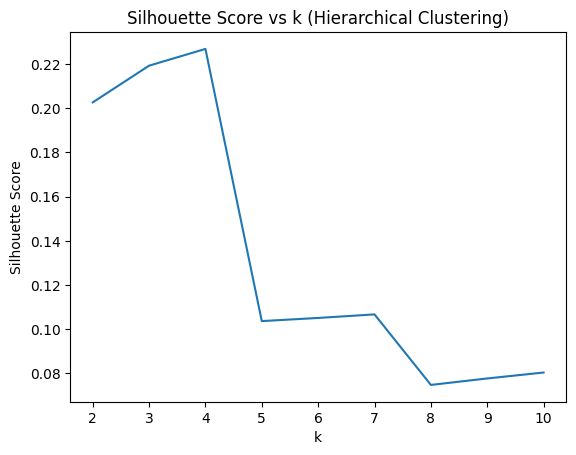

In [33]:
# use Hierarchical Clustering
scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(X_train)
    score = silhouette_score(X_train, agg.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores
plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k (Hierarchical Clustering)')
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_silhouette_hiera.png'))
plt.show()

## 2.2 3D plots for Hierarchical Clusters

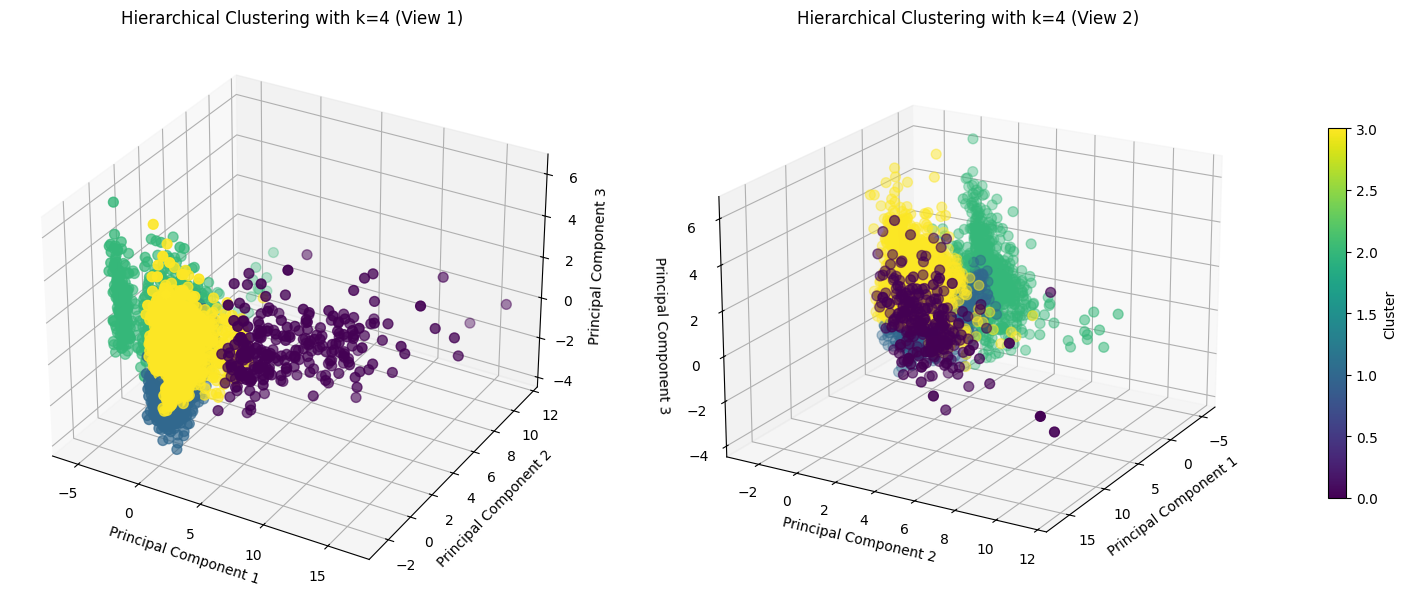

In [34]:
# draw the scatter plot of the data

best_k = scores.index(max(scores)) + 2

agg = AgglomerativeClustering(n_clusters=best_k)
agg.fit(X_scatter)

# 3D plot of the data
# Create a single figure with two subplots
fig = plt.figure(figsize=(20, 8))

# Subplot 1: View 1
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], 
                        c=agg.labels_, cmap='viridis', s=50)
ax1.set_title(f"Hierarchical Clustering with k={best_k} (View 1)")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_zlabel("Principal Component 3")
#ax1.view_init(elev=20, azim=30)  # Adjust viewpoint for the first plot

# Subplot 2: View 2
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], 
                        c=agg.labels_, cmap='viridis', s=50)
ax2.set_title(f"Hierarchical Clustering with k={best_k} (View 2)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")
ax2.view_init(elev=20, azim=30)  # Adjust viewpoint for the second plot

# Add a single colorbar for both subplots
cbar = fig.colorbar(scatter1, ax=[ax1, ax2], shrink=0.6, location='right', label="Cluster")

# Save the combined figure
plt.savefig(os.path.join('../results/', 'clustering_3d_hiera.png'))

plt.show()




## 2.3 Visualize Hierarchical clusters and true labels

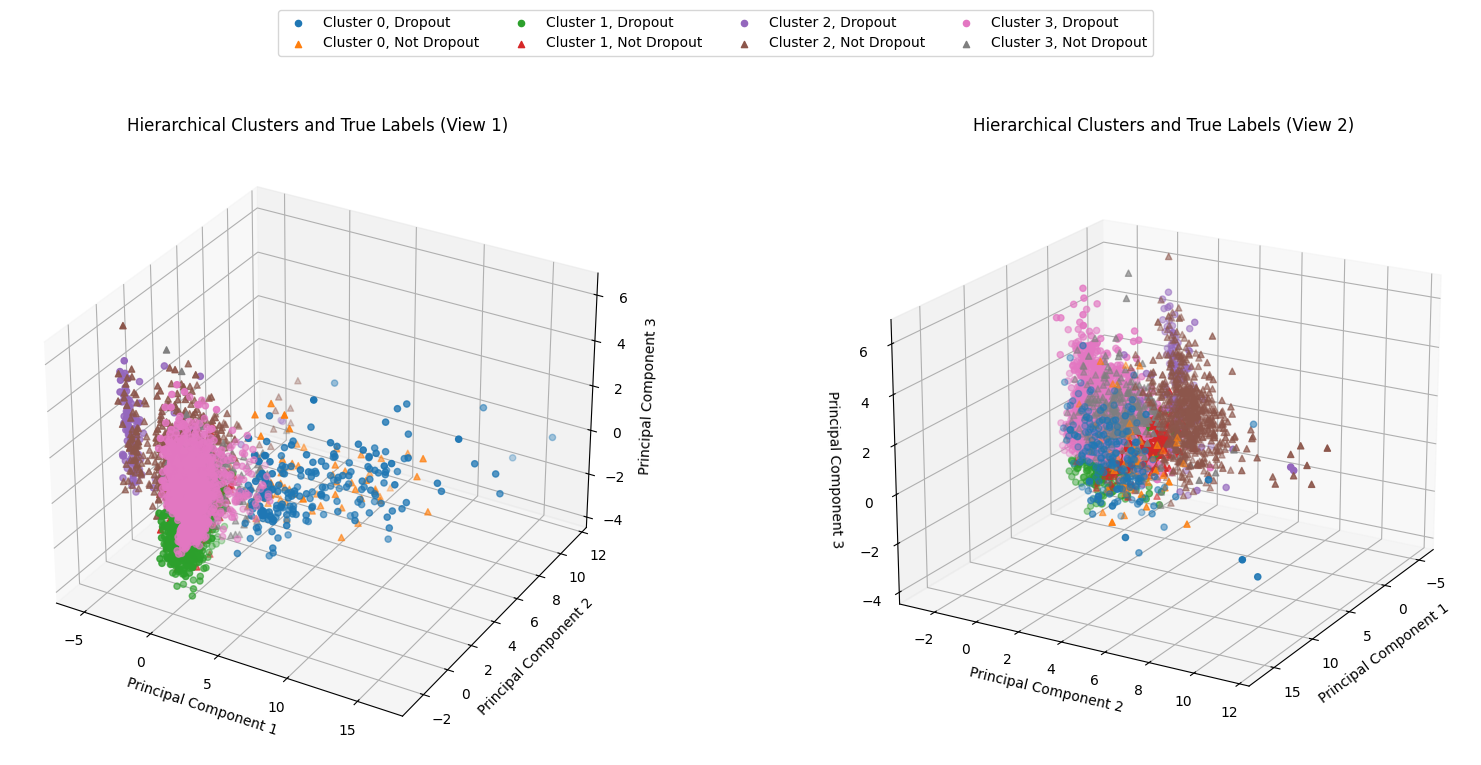

In [35]:
# Create a single figure with two subplots
fig = plt.figure(figsize=(20, 8))

# Subplot 1: View 1
ax1 = fig.add_subplot(121, projection='3d')

# Define marker styles for targets
marker_styles = ['o', '^']  # 'o' for Dropout, '^' for Not Dropout
target_names = {0: 'Dropout', 1: 'Not Dropout'}  # Mapping for legend

# Loop through clusters and targets for View 1
for cluster_id in np.unique(agg.labels_):
    cluster_mask = (agg.labels_ == cluster_id)
    for target in np.unique(y):
        target_mask = (y == target)
        combined_mask = cluster_mask & target_mask
        ax1.scatter(
            X_scatter[combined_mask, 0],
            X_scatter[combined_mask, 1],
            X_scatter[combined_mask, 2],
            marker=marker_styles[target],
            label=f'Cluster {cluster_id}, {target_names[target]}'
        )

ax1.set_title("Hierarchical Clusters and True Labels (View 1)")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_zlabel("Principal Component 3")
#ax1.view_init(elev=20, azim=30)  # Adjust viewpoint for first plot

# Subplot 2: View 2
ax2 = fig.add_subplot(122, projection='3d')

# Loop through clusters and targets for View 2
for cluster_id in np.unique(agg.labels_):
    cluster_mask = (agg.labels_ == cluster_id)
    for target in np.unique(y):
        target_mask = (y == target)
        combined_mask = cluster_mask & target_mask
        ax2.scatter(
            X_scatter[combined_mask, 0],
            X_scatter[combined_mask, 1],
            X_scatter[combined_mask, 2],
            marker=marker_styles[target],
            label=f'Cluster {cluster_id}, {target_names[target]}'
        )

ax2.set_title("Hierarchical Clusters and True Labels (View 2)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")
ax2.view_init(elev=20, azim=30)  # Adjust viewpoint for second plot

# Add a single legend for clarity
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))

# Save the combined plot
plt.savefig(os.path.join('../results/', 'clustering_3d_target_agg.png'))

plt.show()

# 3. DBSCAN 

/var/folders/f3/57ck941n55v4kqtbr7g1rrp40000gn/T/ipykernel_44630/749304697.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


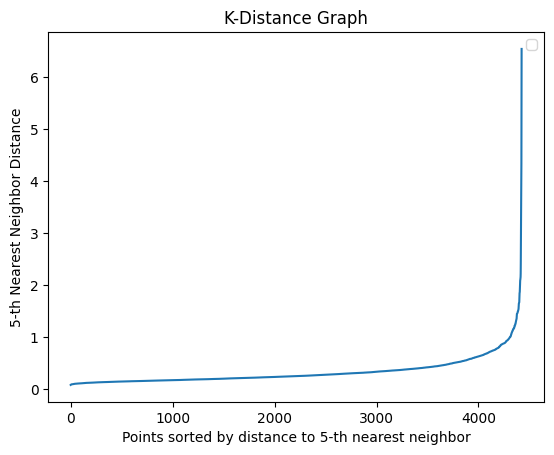

In [ ]:
# Import libraries
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Method to find the best eps value using a k-distance graph
def find_best_eps(X, n_neighbors=5):
    """
    Finds the optimal eps value for DBSCAN using the k-distance graph.
    
    Args:
    - X: Input data (numpy array or dataframe)
    - n_neighbors: Number of neighbors to consider (min_samples in DBSCAN)
    
    """
    nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors = nearest_neighbors.fit(X)
    distances, indices = neighbors.kneighbors(X)
    
    # Sort the distances for the k-th nearest neighbor
    distances = np.sort(distances[:, -1])  # Last column is the k-th distance
    
    # Plot the k-distance graph
    plt.plot(distances)
    # plt.axvline(x=elbow_index, color="red", linestyle="--", label=f"Elbow Point (eps = {distances[elbow_index]:.2f})")
    plt.title("K-Distance Graph")
    plt.xlabel("Points sorted by distance to {}-th nearest neighbor".format(n_neighbors))
    plt.ylabel("{}-th Nearest Neighbor Distance".format(n_neighbors))
    plt.legend()
    plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_kdis_dbscan.png'))
    plt.show()
    


# Find the best eps value
best_eps = find_best_eps(X_scatter, n_neighbors=5)


From the graph, we can see that the elbow point is close to 0.9.

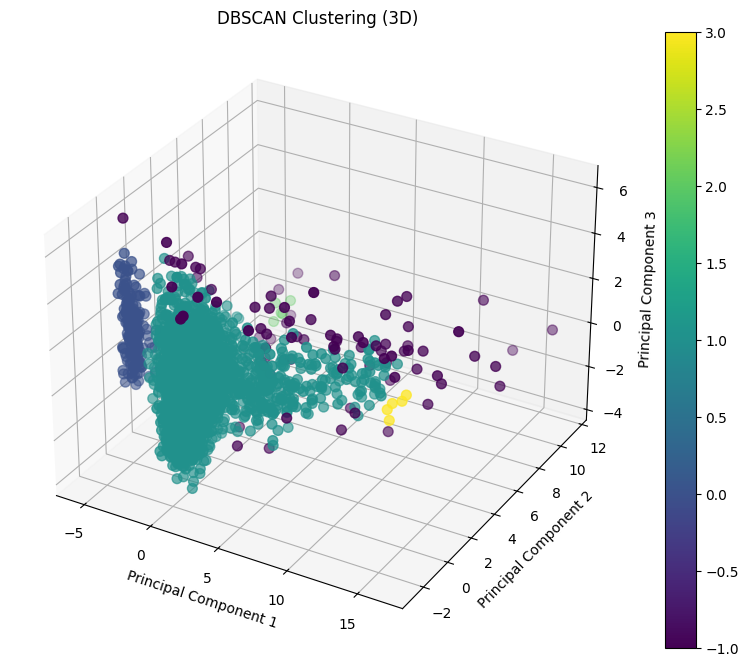

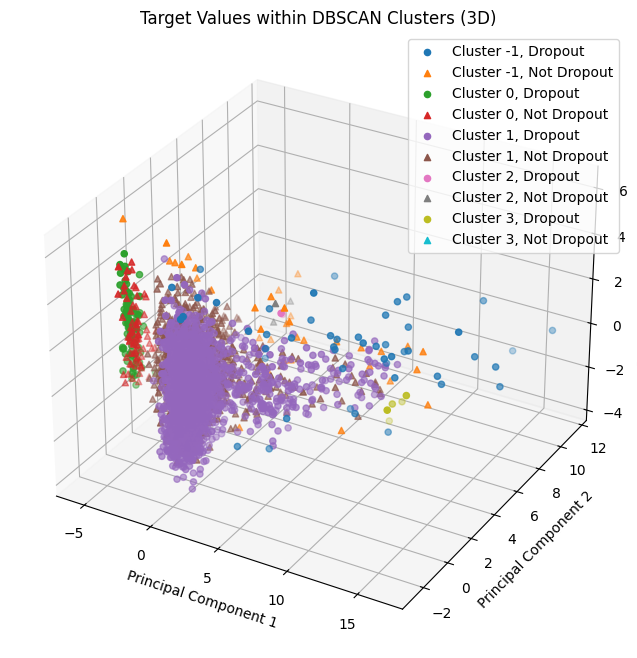

In [37]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X_scatter)

# 3D plot of the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], c=dbscan.labels_, cmap='viridis', s=50)
ax.set_title("DBSCAN Clustering (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter)
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_dbscan.png'))
plt.show()

# 3D Visualize clusters and true labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define marker styles for targets
marker_styles = ['o', '^']  # 'o' for Dropout, '^' for Not Dropout
target_names = {0: 'Dropout', 1: 'Not Dropout'}  # Mapping for legend

# Loop through clusters
for cluster_id in np.unique(dbscan.labels_):
    cluster_mask = (dbscan.labels_ == cluster_id)
    for target in np.unique(y):
        target_mask = (y == target)
        combined_mask = cluster_mask & target_mask
        ax.scatter(
            X_scatter[combined_mask, 0],
            X_scatter[combined_mask, 1],
            X_scatter[combined_mask, 2],
            marker=marker_styles[target],
            label=f'Cluster {cluster_id}, {target_names[target]}'
        )

ax.set_title("Target Values within DBSCAN Clusters (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_target_dbscan.png'))
plt.show()


In [38]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Exclude noise points (label = -1) for silhouette score
non_noise_mask = dbscan.labels_ != -1

if np.sum(non_noise_mask) > 1:  # Ensure there are non-noise points for evaluation
    silhouette = silhouette_score(X_scatter[non_noise_mask], dbscan.labels_[non_noise_mask])
    ch_score = calinski_harabasz_score(X_scatter[non_noise_mask], dbscan.labels_[non_noise_mask])
    db_score = davies_bouldin_score(X_scatter[non_noise_mask], dbscan.labels_[non_noise_mask])
else:
    silhouette = None
    ch_score = None
    db_score = None

# Print metrics
print("DBSCAN Evaluation Metrics (excluding noise):")
if silhouette is not None:
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")
    print(f"Davies-Bouldin Index: {db_score:.4f}")
else:
    print("Insufficient non-noise points for evaluation.")

DBSCAN Evaluation Metrics (excluding noise):
Silhouette Score: 0.4301
Calinski-Harabasz Index: 316.6804
Davies-Bouldin Index: 0.4438


Clustering Visualizations:
- The 2D/3D scatter plots for both KMeans and Hierarchical Clustering demonstrate that the clusters identified do not align well with the target classes (e.g., dropout, not droupout).
- When visualizing the target classes within the same 2D/3D space (using PCA-reduced components), there’s significant overlap between different target groups, indicating that the clusters are not distinctly aligned with the target categories.

Effectiveness of Clustering for Classification:
- The conclusion notes that clustering does not effectively separate the target classes. This suggests that the features in X may not have enough distinct separation to allow clustering algorithms to capture the target classes accurately.
- This lack of separation may imply that other techniques, such as supervised learning algorithms (e.g., logistic regression, decision trees, or support vector machines), may be more suitable for this dataset given the goal is to predict the target classes based on the features.